# Plotting with Matplotlib

Although UXarray's primary plotting API leverages the HoloViz ecosystem, users can still create visualizations using Matplotlib ...

TODO:



In [26]:
import matplotlib.pyplot as plt

import uxarray as ux

In [3]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "outCSne30_vortex.nc"

uxds = ux.open_dataset(grid_path, data_path)

## UXarray's Matplotlib Plotting Functions

In [24]:
import uxarray.plot as uxplot

### `uxarray.plot.imshow()`

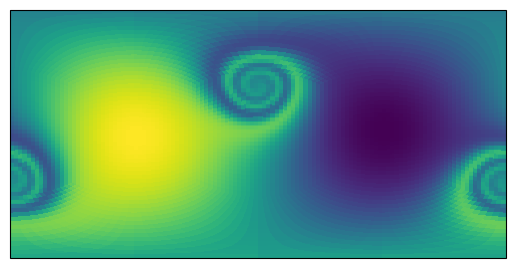

In [28]:
uxplot.imshow(uxds["psi"])

## Integration with Cartopy

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Projections

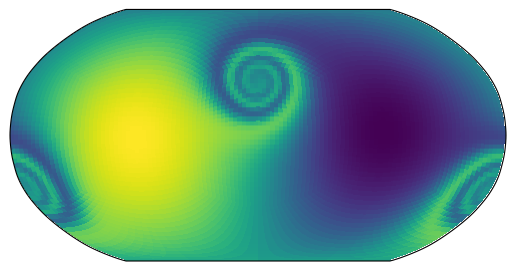

In [7]:
uxplot.imshow(uxds["psi"], projection=ccrs.Robinson())

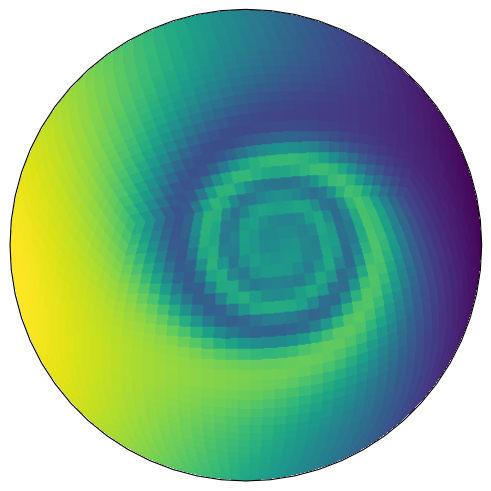

In [23]:
fig, ax = plt.subplots(
    subplot_kw={
        "projection": ccrs.Orthographic(central_longitude=-10, central_latitude=35)
    },
    constrained_layout=True,
)

uxplot.imshow(uxds["psi"], ax=ax)
plt.show()

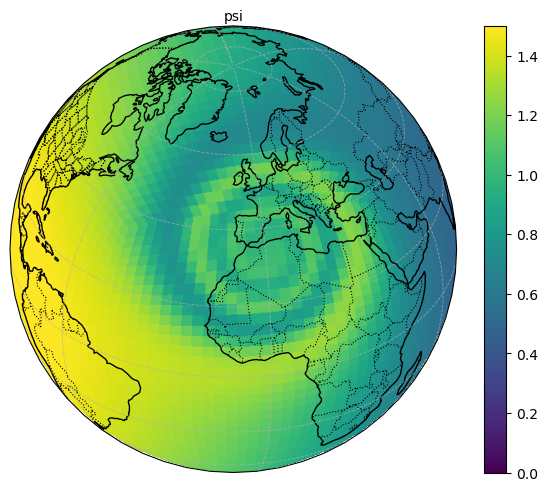

In [42]:
fig, ax = plt.subplots(
    subplot_kw={
        "projection": ccrs.Orthographic(central_longitude=-10, central_latitude=35)
    },
    constrained_layout=True,
)
scale = "110m"


var = uxds["psi"]
my_plot = uxplot.imshow(var, ax=ax, vmin=0, vmax=1.5)

ax.coastlines(resolution=scale, color="black", linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale(scale), linestyle=":", linewidth=0.8)
ax.add_feature(cfeature.STATES.with_scale(scale), linestyle=":", linewidth=0.8)

# gridlines
gl = ax.gridlines(
    draw_labels=False,
    linestyle="--",
    linewidth=0.6,
    alpha=0.7,
)

ax.set_title(f"{var.name}", pad=4, fontsize=10)

cbar = fig.colorbar(
    my_plot,
    ax=ax,
)

plt.show()